# 🧠 Fraud Detection on Imbalanced Dataset
This project focuses on identifying fraudulent transactions using classification models and handling data imbalance.

## 📦 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
pd.set_option('display.float_format',lambda x:'%.2f' % x )

## 📂 Load Dataset

In [5]:
df=pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


## 📊 Exploratory Data Analysis	

In [6]:
df.shape

(6362620, 11)

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
df1=df[df.columns[df.dtypes!='object']]
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0


In [11]:
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [12]:
accuracy_per=(df1['isFraud']==df1['isFlaggedFraud']).mean()
print('The model prediction accuracy percentage :',accuracy_per*100)

The model prediction accuracy percentage : 99.87116942391656


In [13]:
fraud_df=df1[df1['isFraud']==1]
 
acc_per=(fraud_df['isFraud']==fraud_df['isFlaggedFraud']).mean()
print('Fraudalant case detection percentage :',acc_per)

Fraudalant case detection percentage : 0.0019481310118105442


So this shows it performing very poorly on the Fraudalant cases.
___
Reason is the class imbalance in th prediction classess in the Dataset.

There are many ways to handle such cases.

In [14]:
df1['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

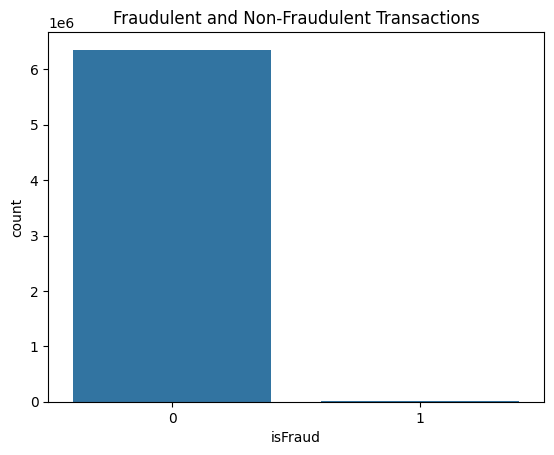

In [15]:
sns.countplot(x='isFraud',data=df1)
plt.title('Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [16]:
X=df1[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df1[['isFraud']]

## ⚖️ Handling Class Imbalance with imbalanced-learn

### 1. Using RandomOverSampler for balancing the dataset designed for imbalanced-class dataset 

In [17]:
X_other,X_val, y_other,y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X_other, y_other)

In [18]:
print('Shape of X_other:', X_other.shape)
print('Shape of X_val:', X_val.shape)   

Shape of X_other: (5090096, 5)
Shape of X_val: (1272524, 5)


In [19]:
print('Shape of the original X:', X.shape)  
print('Shape of the resampled X:', X_resampled.shape)

Shape of the original X: (6362620, 5)
Shape of the resampled X: (10167006, 5)


In [20]:
y.value_counts()

isFraud
0          6354407
1             8213
Name: count, dtype: int64

In [21]:
y_resampled.value_counts()

isFraud
0          5083503
1          5083503
Name: count, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (8133604, 5)
Shape of X_test: (2033402, 5)


#### i. model training and testing

In [23]:
lgbm=LGBMClassifier(n_estimators=100,learning_rate=0.5,random_state=42)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)

C:\Users\rajki\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rajki\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4067129, number of negative: 4066475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 8133604, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500040 -> initscore=0.000161
[LightGBM] [Info] Start training from score 0.000161


#### ii. model evaluation

In [24]:
# with testing data
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1017028
           1       0.99      1.00      0.99   1016374

    accuracy                           0.99   2033402
   macro avg       0.99      0.99      0.99   2033402
weighted avg       0.99      0.99      0.99   2033402



In [25]:
# with validation data
val_pred=lgbm.predict(X_val)
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.12      0.99      0.21      1620

    accuracy                           0.99   1272524
   macro avg       0.56      0.99      0.60   1272524
weighted avg       1.00      0.99      0.99   1272524



### 2. Balancing classes with SMOTE  

#### i. data preprocessing

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [27]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [28]:
# printing column value and their corresponding labels
for i in range(len(le.classes_)):
    print(le.classes_[i], ":", i)

CASH_IN : 0
CASH_OUT : 1
DEBIT : 2
PAYMENT : 3
TRANSFER : 4


In [29]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


#### ii. splitting the dataset

In [30]:
X=df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df[['isFraud']]
X_other,X_val, y_other,y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print('Shape of X_other:', X_other.shape)
print('Shape of X_val:', X_val.shape)

Shape of X_other: (5090096, 6)
Shape of X_val: (1272524, 6)


In [32]:
X_resampled,y_resampled = SMOTE(random_state=42).fit_resample(X_other, y_other)

print('Shape of the original X:', X.shape)
print('Shape of the resampled X:', X_resampled.shape)

Shape of the original X: (6362620, 6)
Shape of the resampled X: (10167006, 6)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (8133604, 6)
Shape of X_test: (2033402, 6)


In [34]:
X_train

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3015829,0,261911.17,271182.52,533093.69,5357773.75,5095862.59
4500443,3,25036.81,0.00,0.00,0.00,0.00
4301941,1,320546.10,0.00,0.00,3466328.78,3786874.88
9916472,4,415244.65,415244.65,0.00,0.00,0.00
6615557,1,18233.45,18233.45,0.00,4752679.55,4824686.01
...,...,...,...,...,...,...
2234489,1,110065.43,475.00,0.00,0.00,110065.43
4304572,4,270970.28,2406.00,0.00,0.00,270970.28
10081351,4,253356.39,253356.39,0.00,0.00,0.00
6550634,1,2923264.39,2923264.39,0.00,146562.23,3069826.62


#### iii. model training and prediction

In [35]:
# Train the model
lgbm=LGBMClassifier(n_estimators=100,learning_rate=0.2,random_state=42)
lgbm.fit(X_train,y_train)

C:\Users\rajki\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rajki\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4067129, number of negative: 4066475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 8133604, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500040 -> initscore=0.000161
[LightGBM] [Info] Start training from score 0.000161


LGBMClassifier(learning_rate=0.2, random_state=42)

In [36]:
y_pred=lgbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1017028
           1       1.00      1.00      1.00   1016374

    accuracy                           1.00   2033402
   macro avg       1.00      1.00      1.00   2033402
weighted avg       1.00      1.00      1.00   2033402



In [37]:
val_pred=lgbm.predict(X_val)
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.30      1.00      0.46      1620

    accuracy                           1.00   1272524
   macro avg       0.65      1.00      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524



## Making a Pipeline

In [38]:
# making the dataset preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler,StandardScaler

In [57]:
# Create ColumnTransformer with proper category specification
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']),
])

# Create pipeline
pipeline = Pipeline(steps=[
    #('preprocessor', preprocessor),
    ('classifier',CatBoostClassifier(iterations=300,learning_rate=0.06,random_state=42))
])

In [ ]:
# actual implementation of the pipeline

# making target and feature variables
X=df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df[['isFraud']]

# splitting the dataset into train and validation set
X_other,X_val, y_other,y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_other:', X_other.shape)
print('Shape of X_val:', X_val.shape)

# resampling the dataset using SMOTE
X_resampled,y_resampled = SMOTE(random_state=42).fit_resample(X_other, y_other)
print('Shape of the original X:', X.shape)
print('Shape of the resampled X:', X_resampled.shape)

# splitting the resampled dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

# fitting the pipeline
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

# printing the classification report
print(classification_report(y_test,y_pred))

Shape of X_other: (5090096, 6)
Shape of X_val: (1272524, 6)
Shape of the original X: (6362620, 6)
Shape of the resampled X: (10167006, 6)
Shape of X_train: (8133604, 6)
Shape of X_test: (2033402, 6)
0:	learn: 0.5346196	total: 498ms	remaining: 2m 28s
1:	learn: 0.4155703	total: 976ms	remaining: 2m 25s
2:	learn: 0.3302055	total: 1.44s	remaining: 2m 22s
3:	learn: 0.2700642	total: 2s	remaining: 2m 28s
4:	learn: 0.2266397	total: 2.9s	remaining: 2m 51s
5:	learn: 0.1941915	total: 3.81s	remaining: 3m 6s
6:	learn: 0.1719167	total: 4.76s	remaining: 3m 19s
7:	learn: 0.1551208	total: 5.68s	remaining: 3m 27s
8:	learn: 0.1400158	total: 6.63s	remaining: 3m 34s
9:	learn: 0.1286074	total: 7.59s	remaining: 3m 40s
10:	learn: 0.1205195	total: 8.52s	remaining: 3m 43s
11:	learn: 0.1133628	total: 9.45s	remaining: 3m 46s
12:	learn: 0.1058442	total: 10.4s	remaining: 3m 48s
13:	learn: 0.1006413	total: 11.3s	remaining: 3m 50s
14:	learn: 0.0957715	total: 12.2s	remaining: 3m 51s
15:	learn: 0.0901802	total: 13s	rema

In [ ]:
# making the prediction on the validation set
val_pred=pipeline.predict(X_val)
print(classification_report(y_val,val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.27      0.99      0.43      1620

    accuracy                           1.00   1272524
   macro avg       0.64      0.99      0.71   1272524
weighted avg       1.00      1.00      1.00   1272524



## ✅ Conclusion

In this project, we tackled the problem of fraud detection using machine learning techniques on an imbalanced dataset. Here's a quick summary of our approach and findings:

- Performed **EDA** to understand the class imbalance and distribution of features.
- Handled class imbalance using **SMOTE / RandomOverSampler** from `imblearn`, improving the representation of minority class samples.
- Trained a **LightGBMClassifier** and optionally a **CatBoostClassifier** to predict fraudulent transactions.
- Evaluated the models using **classification report**.

### 🔍 Key Takeaways
- Handling imbalance significantly improved the model’s ability to detect fraud.
- Random Forest performed well with balanced data, showing good precision and recall.
- LightGBM (if used) provided faster training and competitive performance.
- Model worked better without scaling the data.

### 🚀 Next Steps
- Tune hyperparameters using **GridSearchCV** or **Optuna** for better model performance.
- Explore **ensemble techniques** or **stacking** models.
- Deploy the model using **Flask**, **FastAPI**, or a cloud platform for real-time inference.

This workflow demonstrates the importance of addressing class imbalance in fraud detection tasks to avoid biased models.
